# Fitbit Jupyter Notebook

## Step 1: Analyse the data

In [191]:
%pip install pandas matplotlib seaborn networkx scikit-learn imbalanced-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [192]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE  # For handling imbalanced data
import numpy as np

In [193]:
# Define the path and get all CSV files
path = "../datas/Data Coaching Fitbit/"
files = glob.glob(os.path.join(path, "*.csv"))

In [194]:
# List to store data from all CSVs
dfs = []

# Read all CSV files
for file in files:
    df = pd.read_csv(file)

    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Keep only weekdays (Monday to Friday)
    df = df[df['date'].dt.weekday < 5]

    # Keep only records before 18:00
    df = df[df['date'].dt.hour == 18]

    # Append the cleaned data
    dfs.append(df)

In [195]:
# Concatenate all data
df = pd.concat(dfs, ignore_index=True)

In [196]:

def show_plot(
        x_ticks_rotation=None, x_ticks_ticks=None, x_ticks_label=None,
        tight_layout=None, fig_size=None, title=None, x_label=None,
        y_label=None, legend=False, tile_font_size=None,
        reg_plot_data=None, reg_plot_x=None, reg_plot_y=None,
        reg_plot_scatter=None, reg_plot_ci=None, reg_plot_label=None,
        nbr_of_reg_plot=0, reg_plot_line_kws=None, reg_plot_color=None,
        heatmap_data=None, heatmap_annot=None, heatmap_cmap=None,
        heatmap_center=None, heatmap_fmt=None, heatmap_xticklabels=None,
        heatmap_yticklabels=None,
        dag_graph=None, dag_pos=None, dag_with_labels=None,
        dag_node_size=None, dag_node_color=None, dag_node_font_size=None,
        dag_font_weight=None, dag_edge_color=None,
        bar_plot_x=None, bar_plot_y=None, bar_plot_hue=None,
        bar_plot_palette=None, bar_plot_legend=None
    ):

    fig, ax = plt.subplots(figsize=fig_size if fig_size is not None else (12, 6))

    # Plot regression if data provided
    if nbr_of_reg_plot > 0 and reg_plot_data is not None and reg_plot_x is not None and reg_plot_y is not None:
        # Convert all reg_plot parameters to lists if they aren't already
        if not isinstance(reg_plot_data, list):
            reg_plot_data = [reg_plot_data] * nbr_of_reg_plot
        if not isinstance(reg_plot_x, list):
            reg_plot_x = [reg_plot_x] * nbr_of_reg_plot
        if not isinstance(reg_plot_y, list):
            reg_plot_y = [reg_plot_y] * nbr_of_reg_plot
        if not isinstance(reg_plot_scatter, list):
            reg_plot_scatter = [reg_plot_scatter] * nbr_of_reg_plot
        if not isinstance(reg_plot_ci, list):
            reg_plot_ci = [reg_plot_ci] * nbr_of_reg_plot
        if not isinstance(reg_plot_label, list):
            reg_plot_label = [reg_plot_label] * nbr_of_reg_plot
        if not isinstance(reg_plot_line_kws, list):
            reg_plot_line_kws = [reg_plot_line_kws] * nbr_of_reg_plot
        if not isinstance(reg_plot_color, list):
            reg_plot_color = [reg_plot_color] * nbr_of_reg_plot

        # Plot each regression
        for i in range(nbr_of_reg_plot):
            sns.regplot(
                data=reg_plot_data[i], x=reg_plot_x[i], y=reg_plot_y[i],
                scatter=reg_plot_scatter[i] if reg_plot_scatter[i] is not None else True,
                ci=reg_plot_ci[i],
                label=reg_plot_label[i],
                line_kws=reg_plot_line_kws[i],  # Nouveau paramètre
                color=reg_plot_color[i],
                ax=ax
            )

    # Plot heatmap if data provided
    if heatmap_data is not None:
        if heatmap_xticklabels is not None:
            sns.heatmap(
                data=heatmap_data, annot=heatmap_annot, cmap=heatmap_cmap,
                center=heatmap_center, fmt=heatmap_fmt,
                xticklabels=heatmap_xticklabels, yticklabels=heatmap_yticklabels,
                ax=ax
            )
        else:
            sns.heatmap(
                data=heatmap_data, annot=heatmap_annot, cmap=heatmap_cmap,
                center=heatmap_center,
                ax=ax
            )

    # Plot DAG if data provided
    if dag_graph is not None:
        nx.draw(
            dag_graph, pos=dag_pos, with_labels=dag_with_labels,
            node_size=dag_node_size, node_color=dag_node_color,
            font_size=dag_node_font_size, font_weight=dag_font_weight,
            edge_color=dag_edge_color, ax=ax
        )

    if bar_plot_x is not None and bar_plot_y is not None:
        sns.barplot(
            x=bar_plot_x,
            y=bar_plot_y,
            hue=bar_plot_hue,
            palette=bar_plot_palette,
            legend=bar_plot_legend,
            ax=ax
        )

    # Set x-ticks if provided
    if x_ticks_ticks is not None and x_ticks_label is not None:
        ax.set_xticks(x_ticks_ticks)
        ax.set_xticklabels(x_ticks_label, rotation=x_ticks_rotation if x_ticks_rotation is not None else 0)

    # Set title and labels
    if title is not None:
        ax.set_title(title, fontsize=tile_font_size if tile_font_size is not None else 16)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

    # Show legend only if label was provided and legend=True
    if legend and any(label is not None for label in reg_plot_label) if isinstance(reg_plot_label, list) else reg_plot_label is not None:
        ax.legend()

    if tight_layout is not None:
        fig.tight_layout(rect=tight_layout)

    plt.show()

In [197]:
def show_sub_plot(data, plot_config, fig_size=(12, 10), title=None, 
                 xticks_rotation=45, tight_layout=[0, 0, 1, 0.96], 
                 plot_type='line'):
    """
    Version améliorée qui gère différents types de graphiques
    
    Args:
        data: DataFrame contenant les données
        plot_config: Liste de dicts avec configuration pour chaque sous-graphique
        fig_size: Taille de la figure
        title: Titre principal
        xticks_rotation: Rotation des étiquettes x
        tight_layout: Paramètres de mise en page
        plot_type: 'line' ou 'bar' (type de graphique par défaut)
    """
    n_plots = len(plot_config)
    n_rows = int(np.ceil(n_plots / 2))
    
    fig, axes = plt.subplots(n_rows, min(2, n_plots), figsize=fig_size)
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    if title:
        fig.suptitle(title)

    for ax, config in zip(axes, plot_config):
        current_type = config.get('type', plot_type)
        
        if current_type == 'line':
            ax.plot(data[config['x']], data[config['y']], 
                    marker=config.get('marker', 'o'),
                    linestyle=config.get('linestyle', '-'),
                    color=config.get('color'),
                    label=config.get('label'))
        elif current_type == 'bar':
            data[config['y']].plot(kind='bar', ax=ax,
                                  color=config.get('color'),
                                  label=config.get('label'))
        
        ax.set_title(config.get('title', ''))
        ax.set_xlabel(config.get('xlabel', ''))
        ax.set_ylabel(config.get('ylabel', ''))
        
        if 'xticklabels' in config:
            ax.set_xticklabels(config['xticklabels'], rotation=xticks_rotation)
        elif xticks_rotation:
            ax.tick_params(axis='x', rotation=xticks_rotation)
        
        if config.get('legend'):
            ax.legend()

    plt.tight_layout(rect=tight_layout)
    plt.show()

### Plot 1: Analyze activity by persons

In [198]:
def plot_person_data(treatment_id, df):
    # Configuration des graphiques pour les données temporelles
    plot_config = [
        {'x': 'date', 'y': 'steps', 'type': 'line', 'color': None,
         'title': 'Steps Over Time', 'ylabel': 'Steps', 'xlabel': 'Date'},
        
        {'x': 'date', 'y': 'calories', 'type': 'line', 'color': 'red',
         'title': 'Calories Burned Over Time', 'ylabel': 'Calories', 'xlabel': 'Date'},
        
        {'x': 'date', 'y': 'distance', 'type': 'line', 'color': 'green',
         'title': 'Distance Over Time', 'ylabel': 'Distance (km)', 'xlabel': 'Date'},
        
        {'x': 'date', 'y': 'mets', 'type': 'line', 'color': 'purple',
         'title': 'METs Over Time', 'ylabel': 'METs', 'xlabel': 'Date'}
    ]

    # Appel à la nouvelle version de show_sub_plot
    show_sub_plot(
        data=df,
        plot_config=plot_config,
        title=f'Activity Data for Person {treatment_id}',
        fig_size=(12, 10),
        xticks_rotation=45,
        tight_layout=[0, 0, 1, 0.96],
        plot_type='line'  # Valeur par défaut
    )

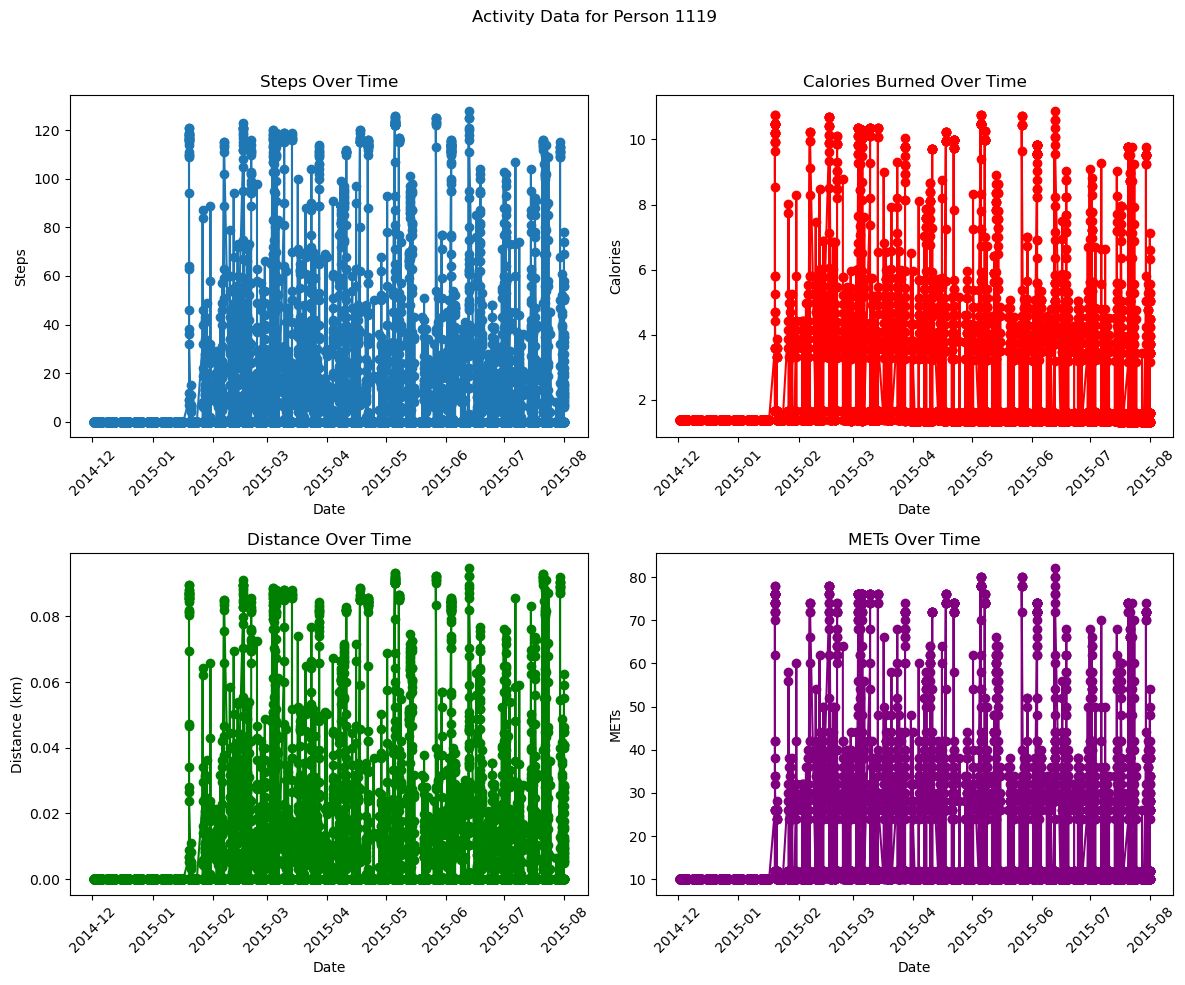

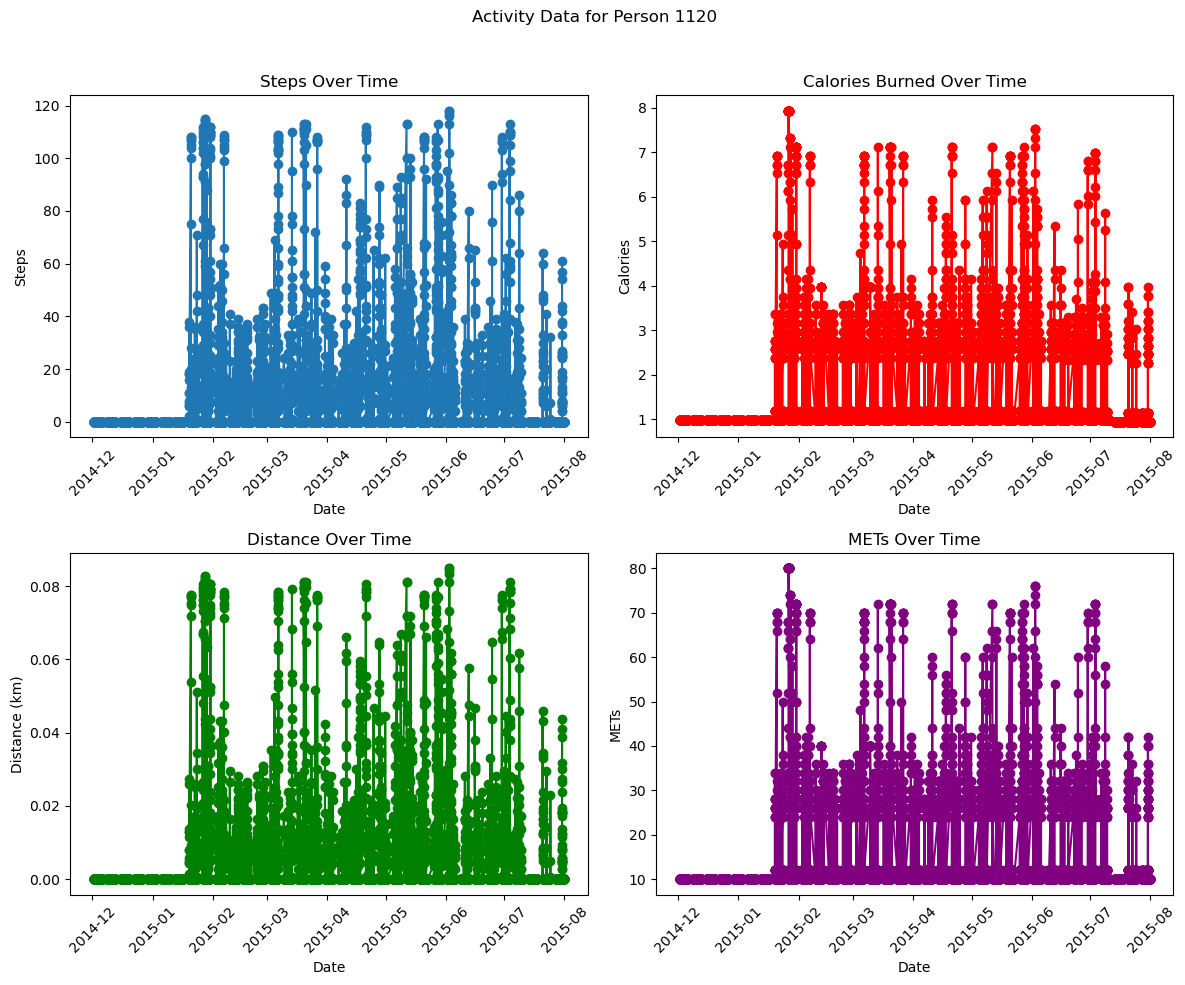

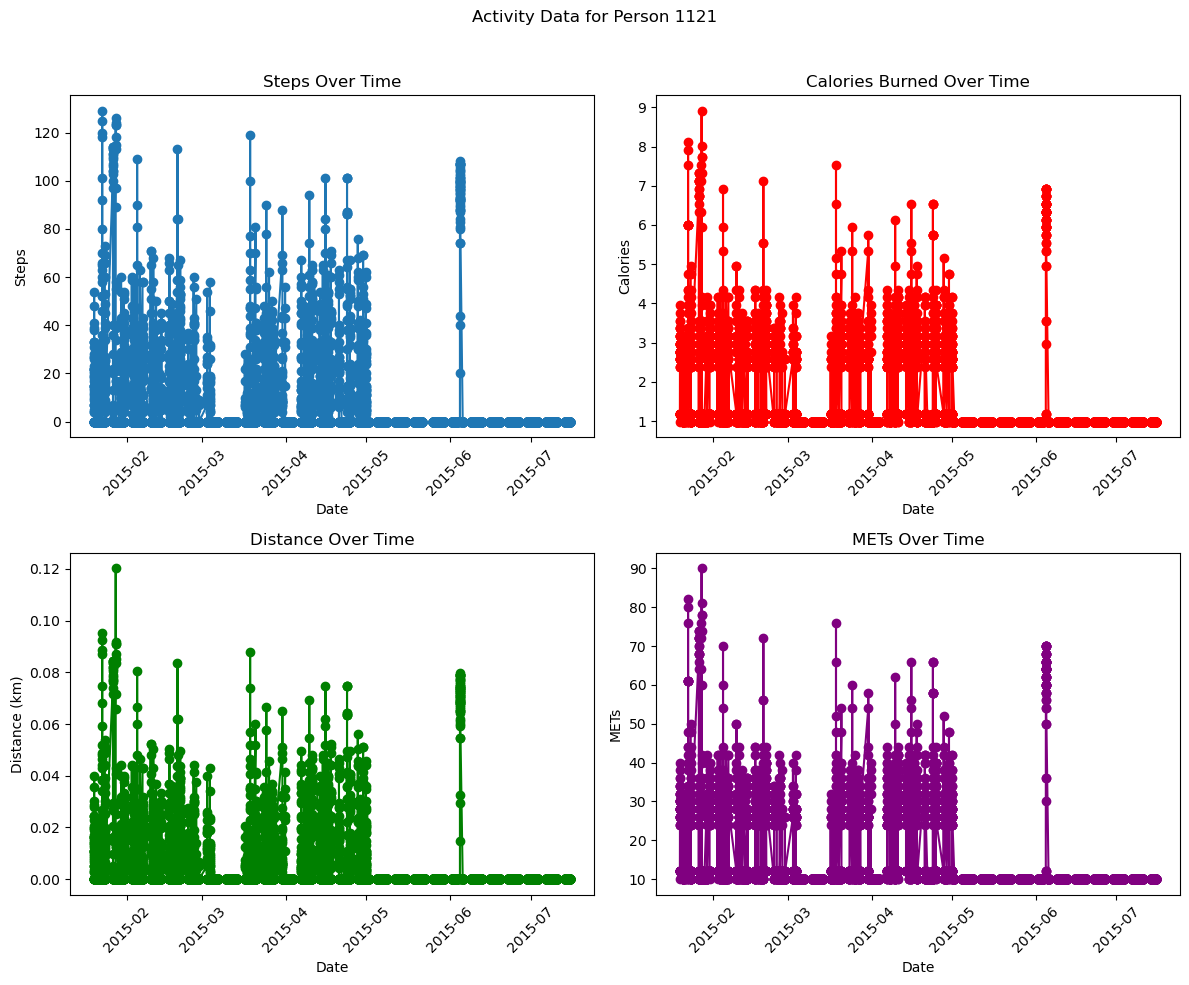

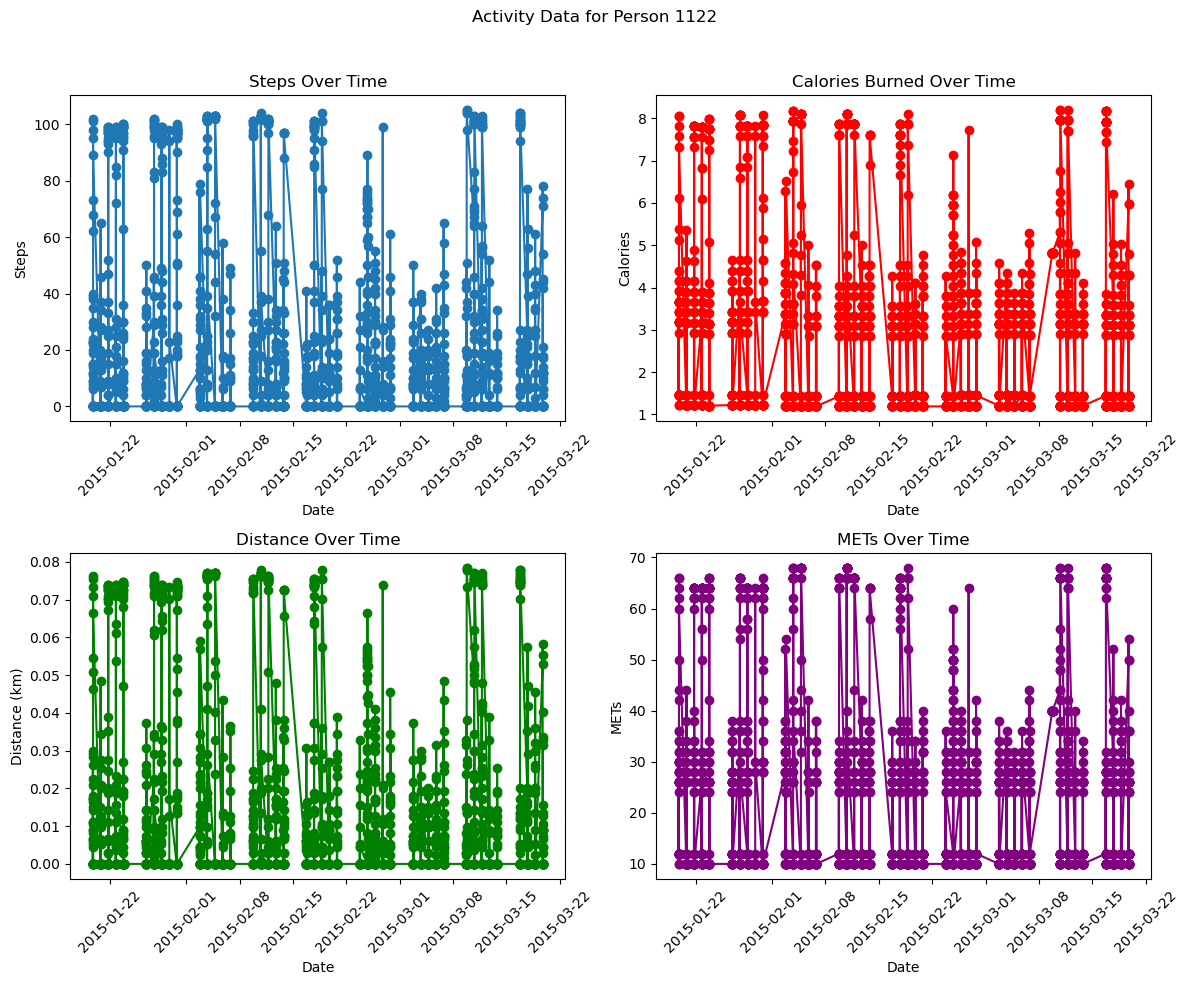

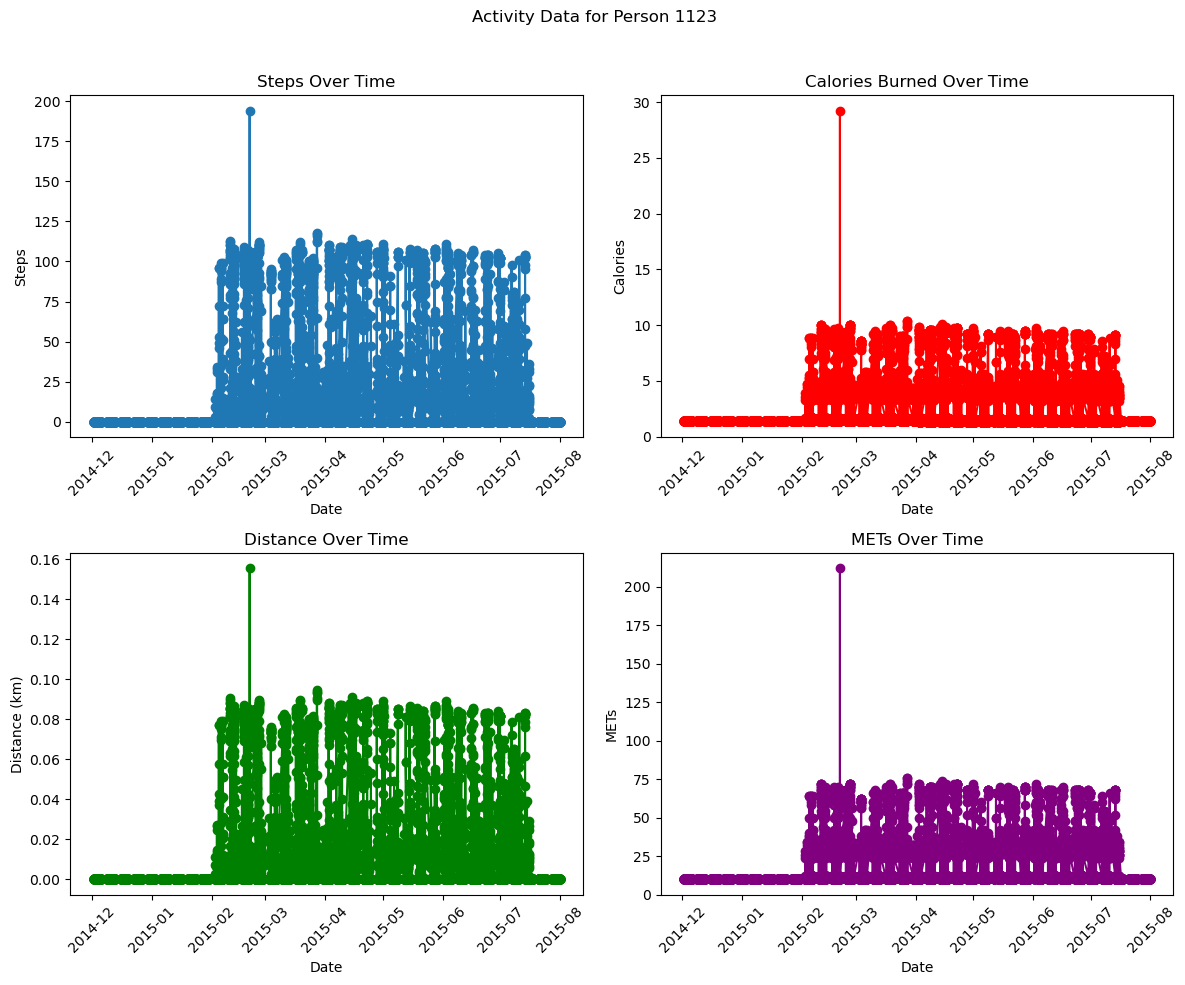

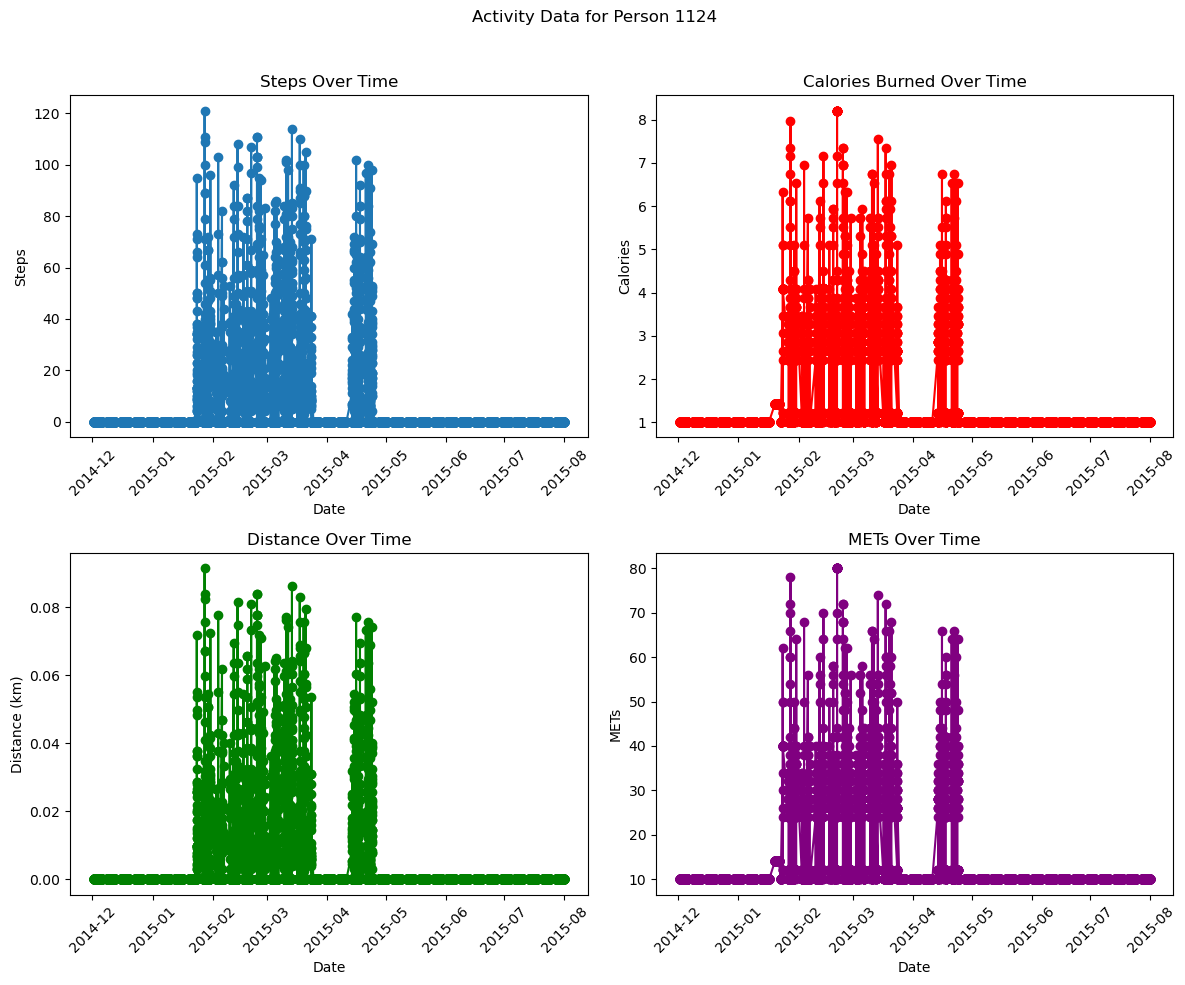

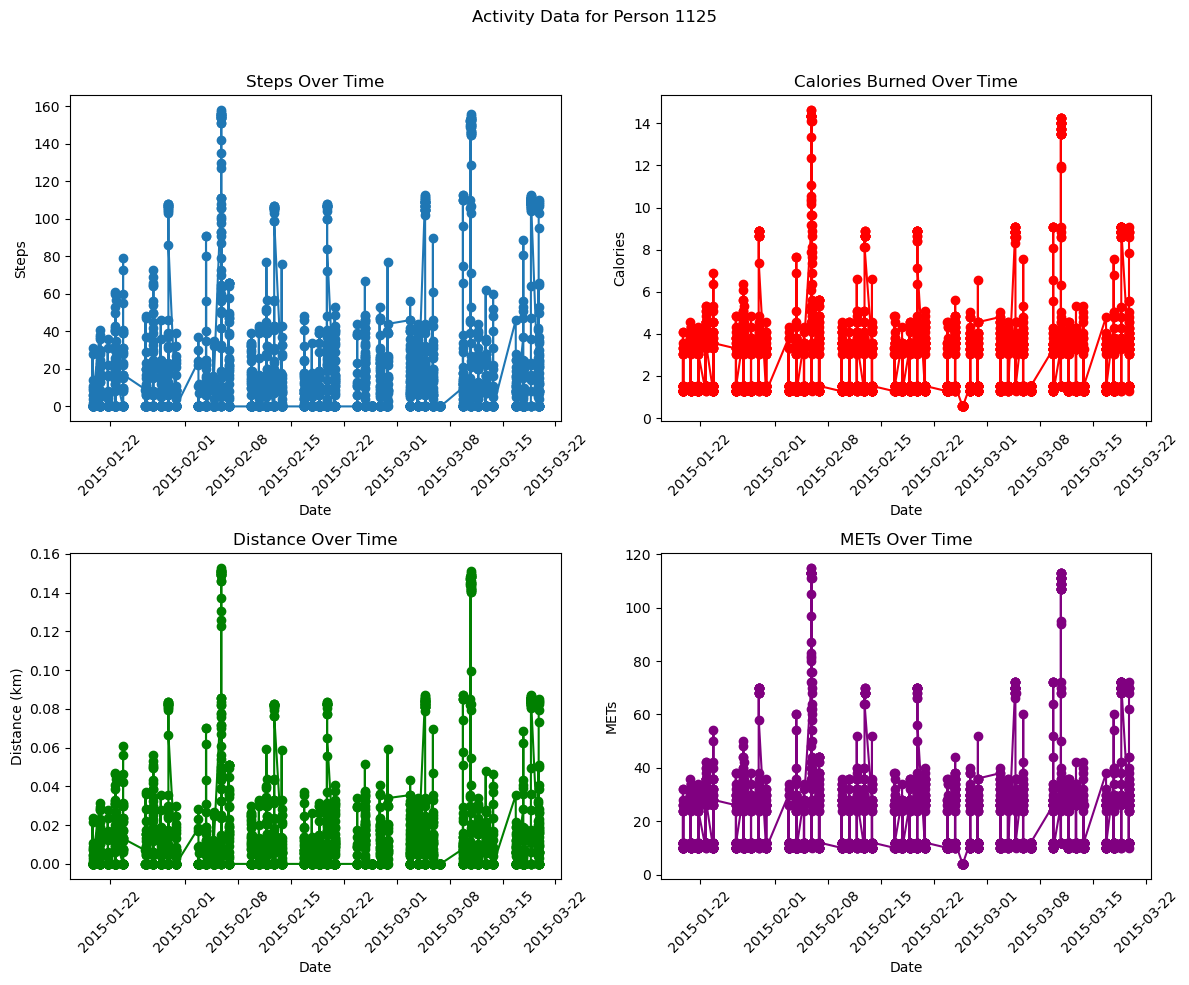

In [199]:
# Group by treatment_id and plot each person's data
for treatment_id, person_df in df.groupby("treatment_id"):
    plot_person_data(treatment_id, person_df)

### Plot 2: Comparison of Activity across individuals

In [200]:
def plot_group_comparison(df):
    # Préparation des données
    df_summary = df.groupby("treatment_id").agg({
        "steps": "mean",
        "calories": "mean",
        "distance": "mean",
        "mets": "mean"
    }).rename(columns={
        "steps": "Avg Steps",
        "calories": "Avg Calories",
        "distance": "Avg Distance",
        "mets": "Avg METs"
    })

    # Configuration des graphiques
    plot_config = [
        {'y': 'Avg Steps', 'type': 'bar', 'color': 'blue',
         'title': 'Average Steps', 'ylabel': 'Steps', 'xlabel': 'Person ID'},
        
        {'y': 'Avg Calories', 'type': 'bar', 'color': 'red',
         'title': 'Average Calories', 'ylabel': 'Calories', 'xlabel': 'Person ID'},
        
        {'y': 'Avg Distance', 'type': 'bar', 'color': 'green',
         'title': 'Average Distance', 'ylabel': 'Distance (km)', 'xlabel': 'Person ID'},
        
        {'y': 'Avg METs', 'type': 'bar', 'color': 'purple',
         'title': 'Average METs', 'ylabel': 'METs', 'xlabel': 'Person ID',
         'xticklabels': df_summary.index}
    ]

    # Appel à la fonction générique
    show_sub_plot(
        data=df_summary,
        plot_config=plot_config,
        title="Comparison of Activity Metrics Across Individuals",
        xticks_rotation=45,
        tight_layout=[0, 0, 1, 0.96],
        plot_type='bar'  # Valeur par défaut pour tous les graphiques
    )

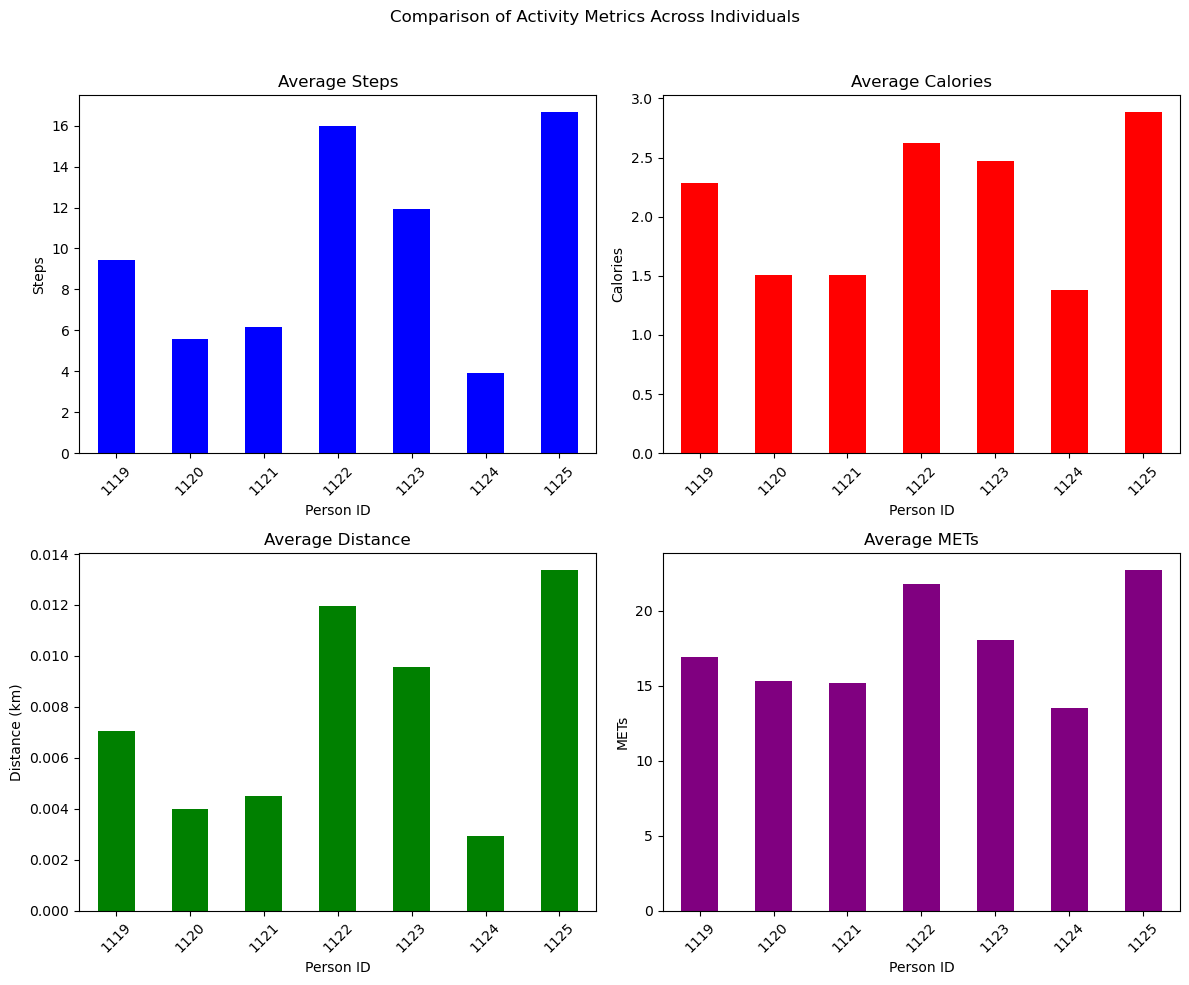

In [201]:
plot_group_comparison(df)

### Plot 3: Individual means

In [202]:
# Compute individual means for steps
individual_means = df.groupby(['treatment_id', df['date'].dt.date])['steps'].mean().reset_index()

In [203]:
# Convert 'date' back to datetime format
individual_means['date'] = pd.to_datetime(individual_means['date'])

In [204]:
treatment_ids = individual_means['treatment_id'].unique()

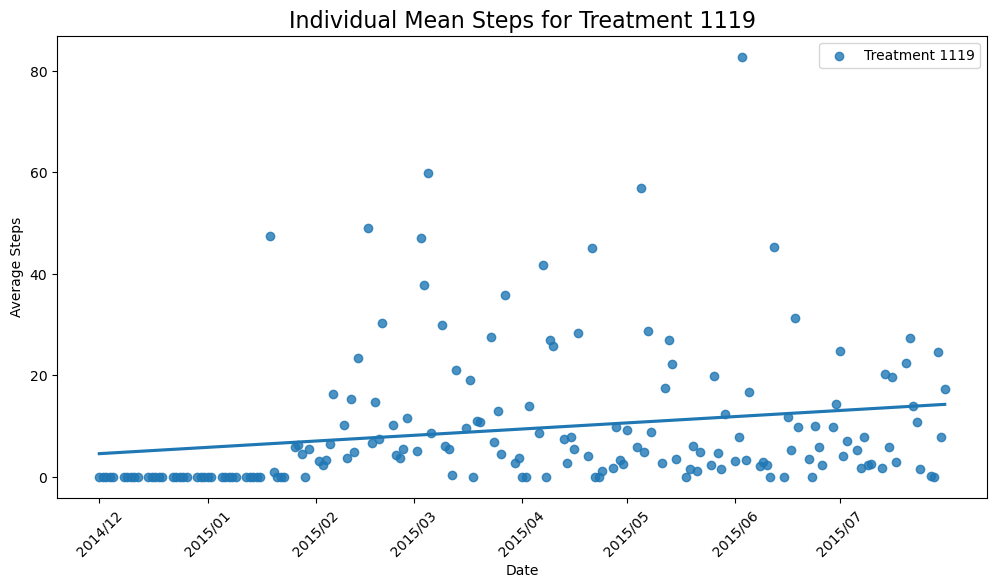

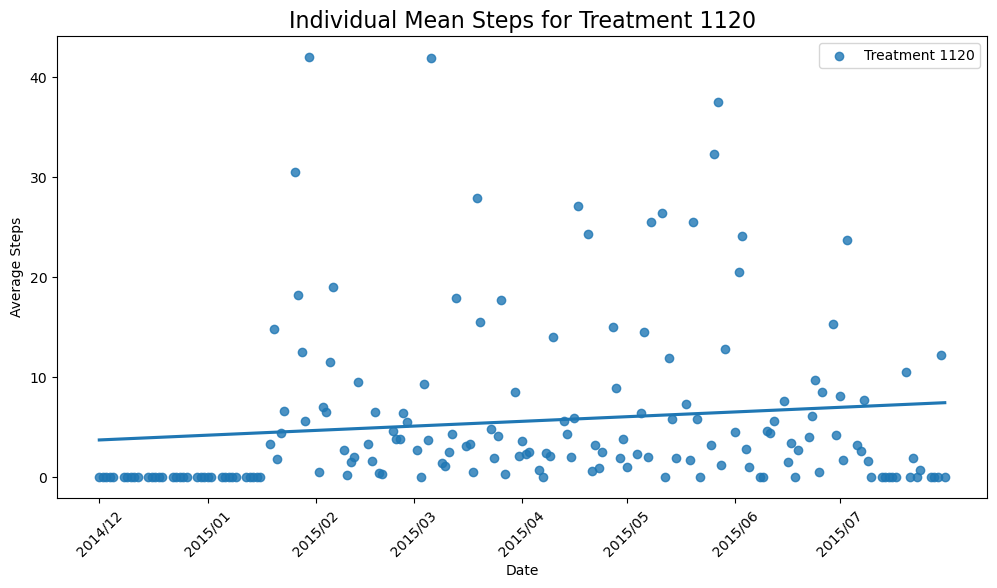

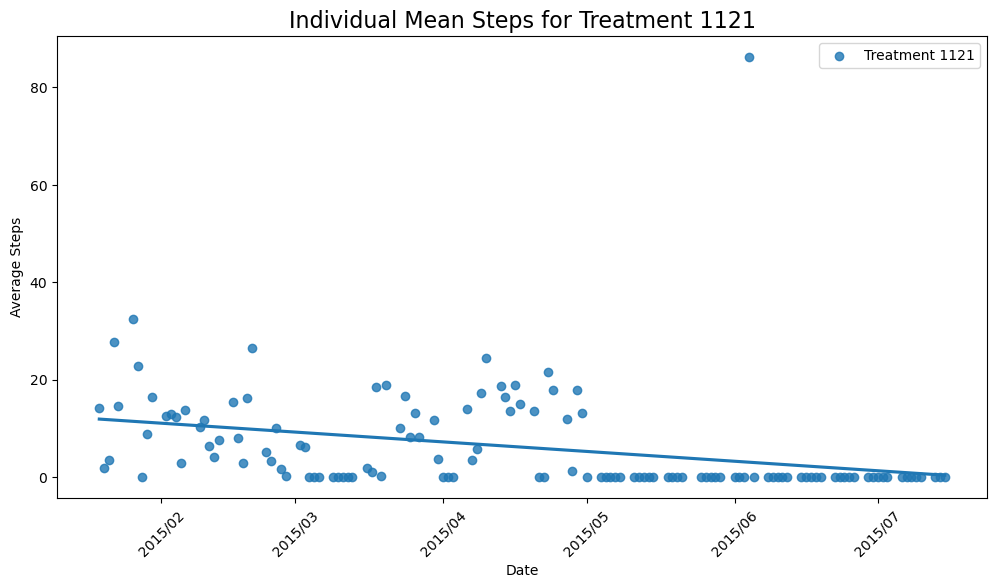

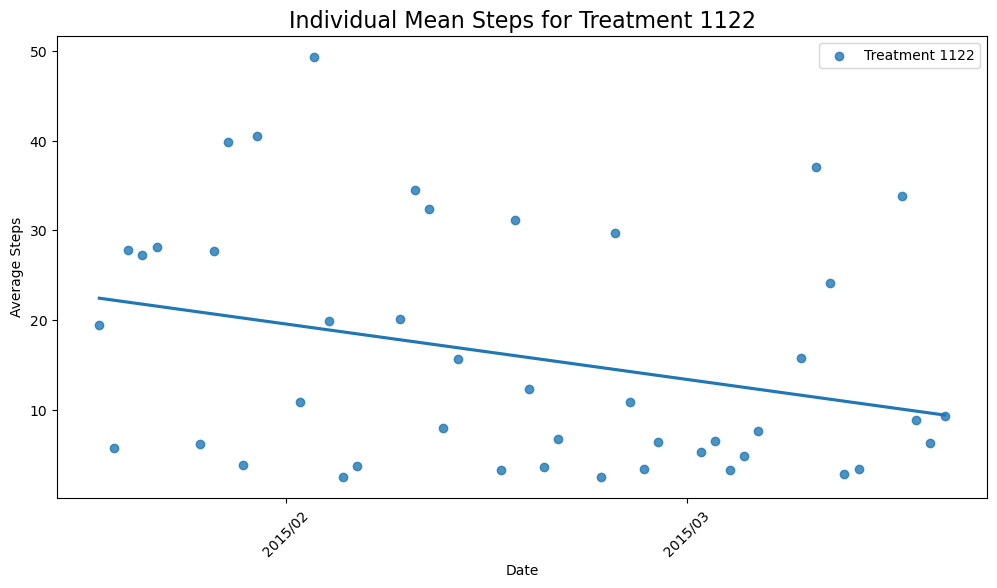

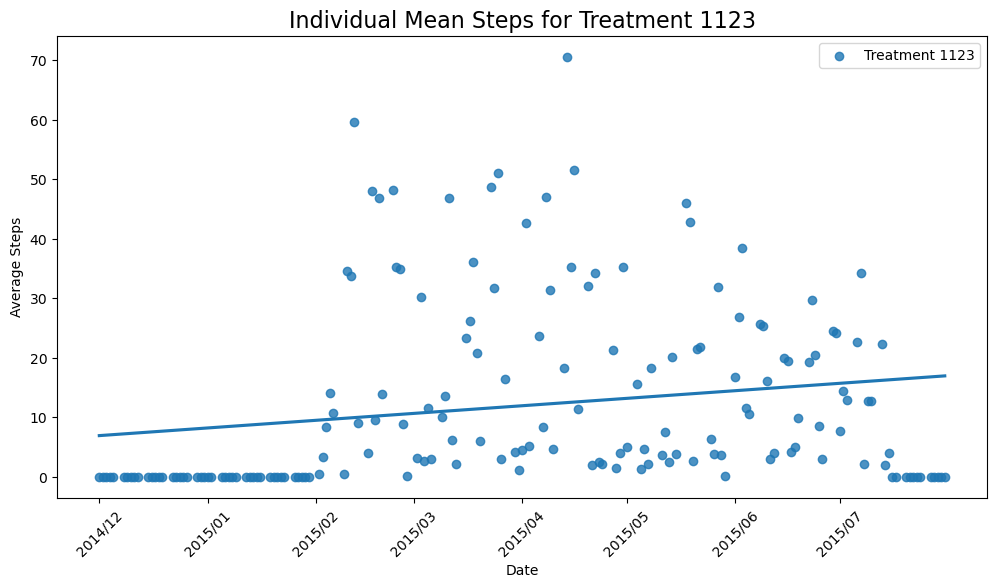

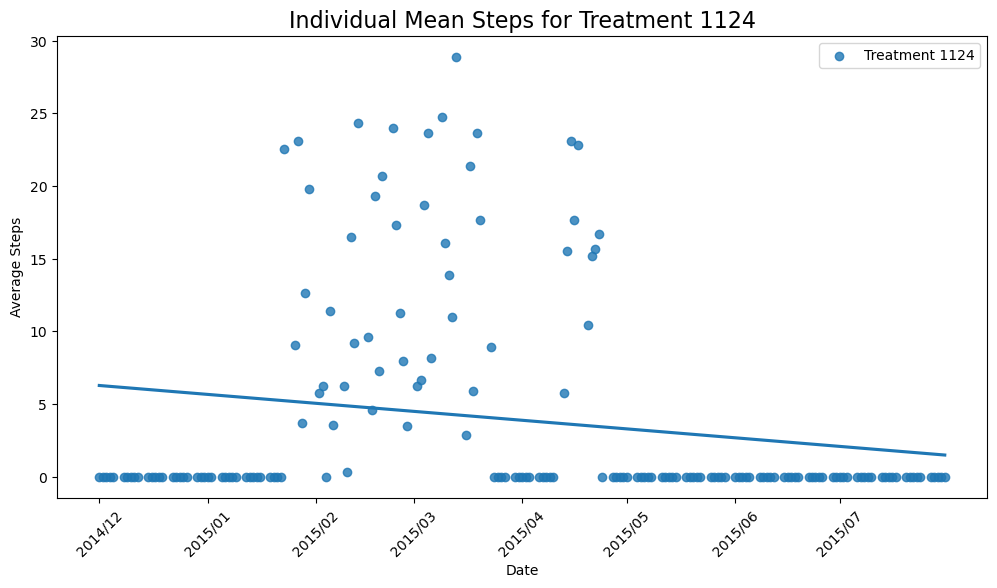

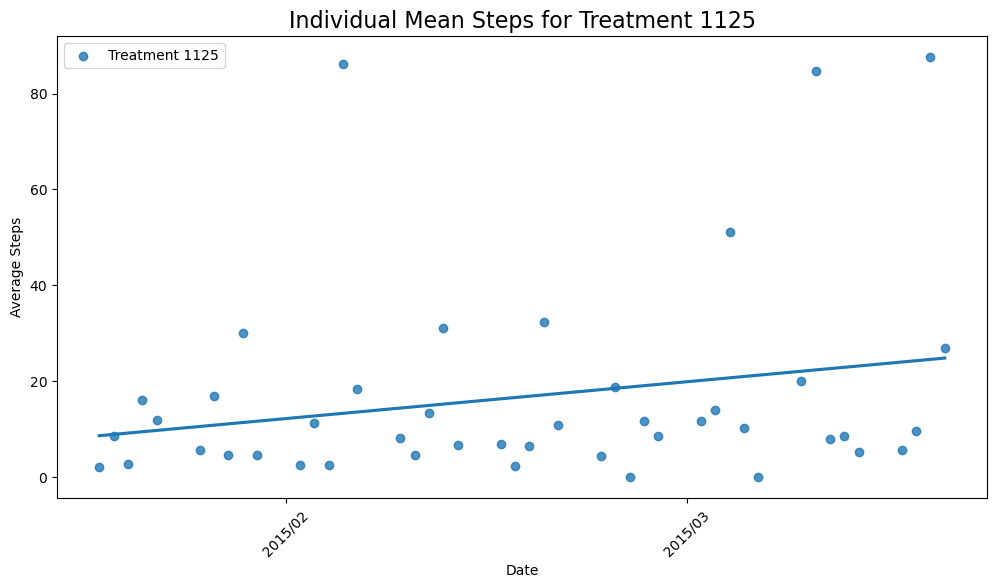

In [205]:
for treatment in treatment_ids:
    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()

    # Convert 'date' to numeric for regression
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Prepare x-ticks (first day of each month)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')
    month_numeric = (months - subset['date'].min()).days

    # Use show_plot function with modified label format
    show_plot(
        fig_size=(12, 6),
        reg_plot_data=subset,
        reg_plot_x='date_numeric',
        reg_plot_y='steps',
        reg_plot_scatter=True,
        reg_plot_ci=None,
        reg_plot_label=f'Treatment {treatment}',
        nbr_of_reg_plot=1,
        x_ticks_ticks=month_numeric,
        x_ticks_label=months.strftime('%Y/%m'),
        x_ticks_rotation=45,
        title=f"Individual Mean Steps for Treatment {treatment}",
        x_label="Date",
        y_label="Average Steps",
        legend=True
    )

### Plot 4: Average steps

In [206]:
# Compute the average of all individuals' steps per day
average_steps = df.groupby([df['date'].dt.date])['steps'].mean().reset_index()

In [207]:
# Convert 'date' back to datetime format
average_steps['date'] = pd.to_datetime(average_steps['date'])

In [230]:
# Calculate and print the average number of steps
overall_avg_steps = average_steps['steps'].mean()
print(f"Average number of steps: {overall_avg_steps:.2f} by minute")
print(f"Average number of steps: {overall_avg_steps * 60:.2f} by hour")
print(f"Average number of steps: {overall_avg_steps * 60 * 24:.2f} by day")

Average number of steps: 7.49 by minute
Average number of steps: 449.34 by hour
Average number of steps: 10784.24 by day


In [231]:
# Calculate the average number of steps per person at 18:00 on a working day
average_steps_per_person = df.groupby('treatment_id')['steps'].mean()
print("Average number of steps per person at 18:00 on a working day:")
print(average_steps_per_person)

Average number of steps per person at 18:00 on a working day:
treatment_id
1119     9.429524
1120     5.559619
1121     6.154593
1122    15.993182
1123    11.948286
1124     3.895048
1125    16.647727
Name: steps, dtype: float64


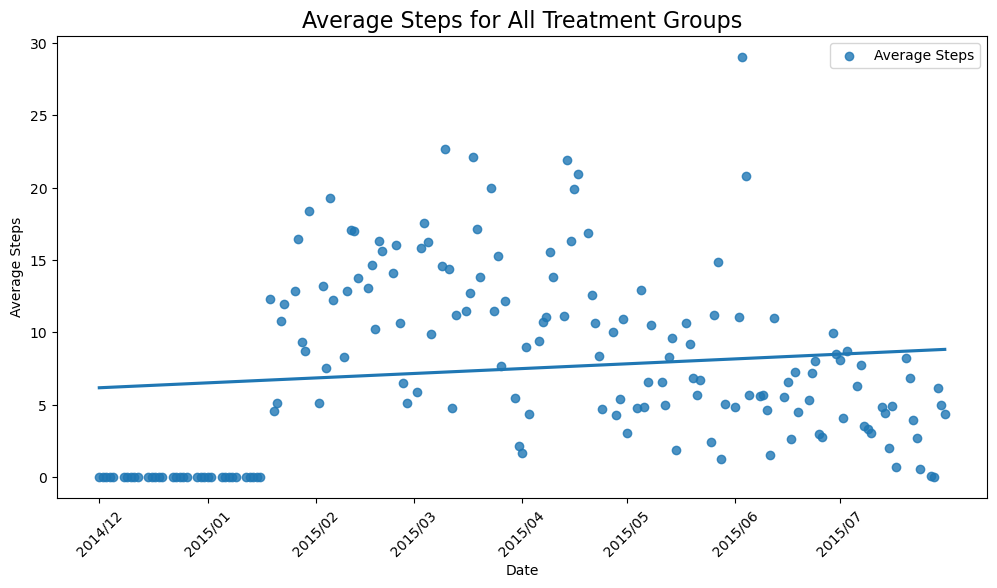

In [209]:
# Convert 'date' to numeric for regression
average_steps['date_numeric'] = (average_steps['date'] - average_steps['date'].min()).dt.days

# Prepare x-ticks (first day of each month)
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')
month_numeric = (months - average_steps['date'].min()).days

# Use show_plot function with modified label format
show_plot(
    fig_size=(12, 6),
    reg_plot_data=average_steps,
    reg_plot_x='date_numeric',
    reg_plot_y='steps',
    reg_plot_scatter=True,
    reg_plot_ci=None,
    reg_plot_label='Average Steps',
    nbr_of_reg_plot=1,
    x_ticks_ticks=month_numeric,
    x_ticks_label=months.strftime('%Y/%m'),
    x_ticks_rotation=45,
    title="Average Steps for All Treatment Groups",
    x_label="Date",
    y_label="Average Steps",
    legend=True
)

### Plot 5: Individual plots with average steps superposed

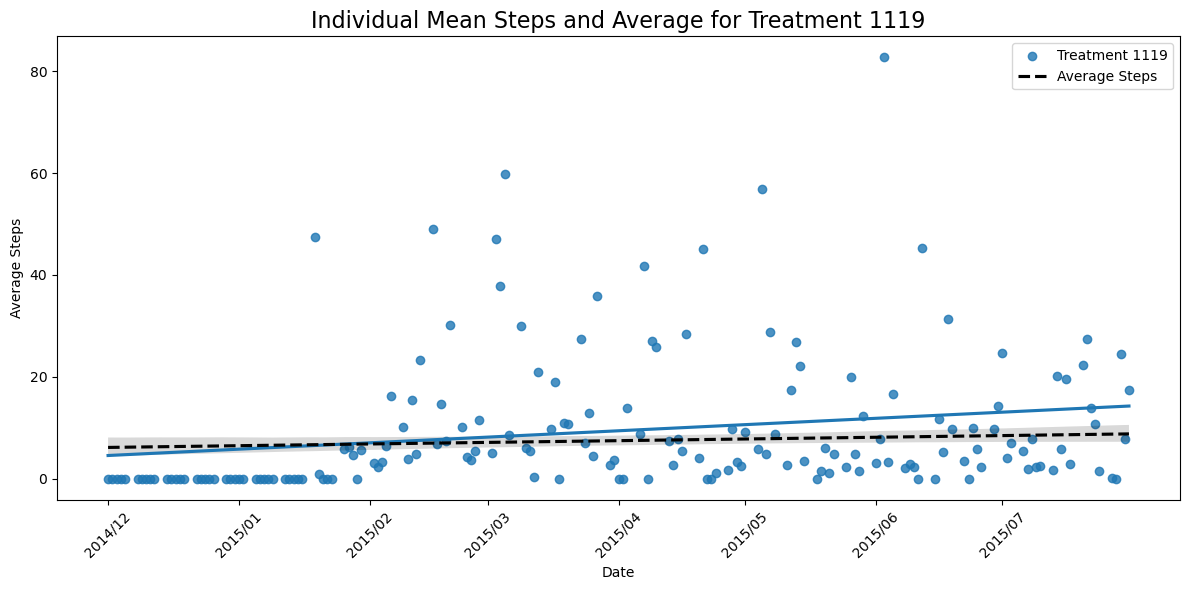

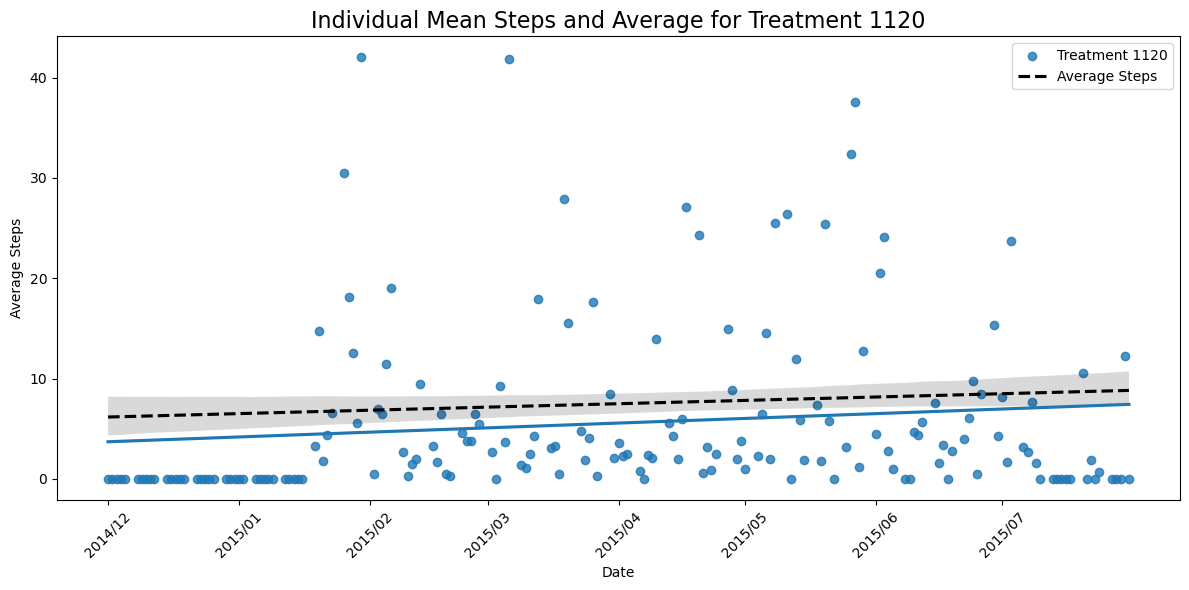

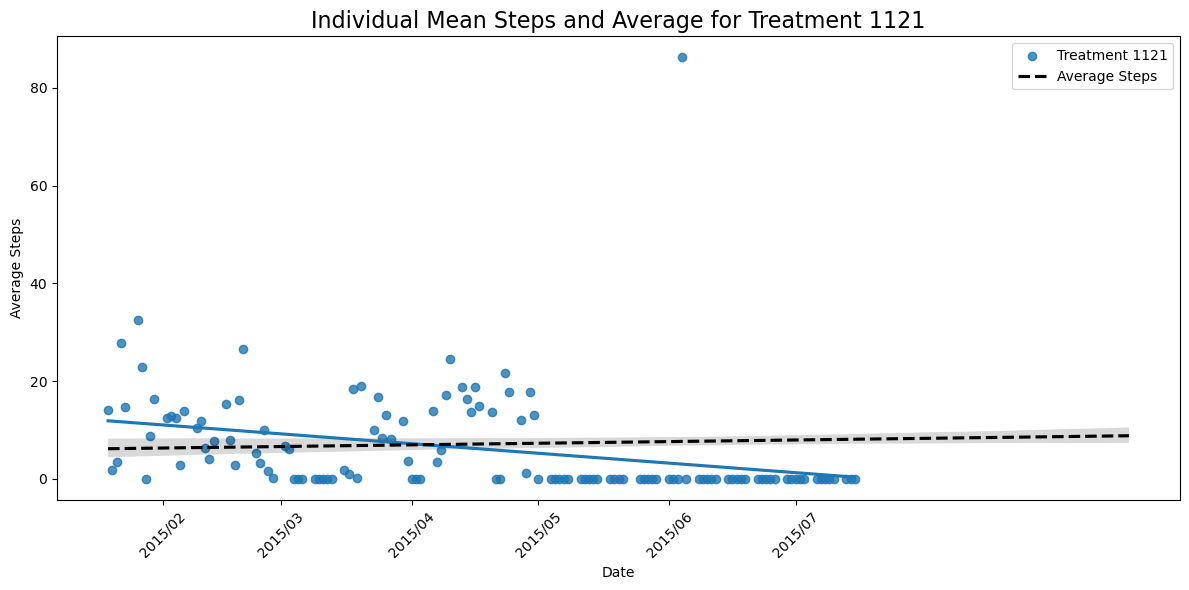

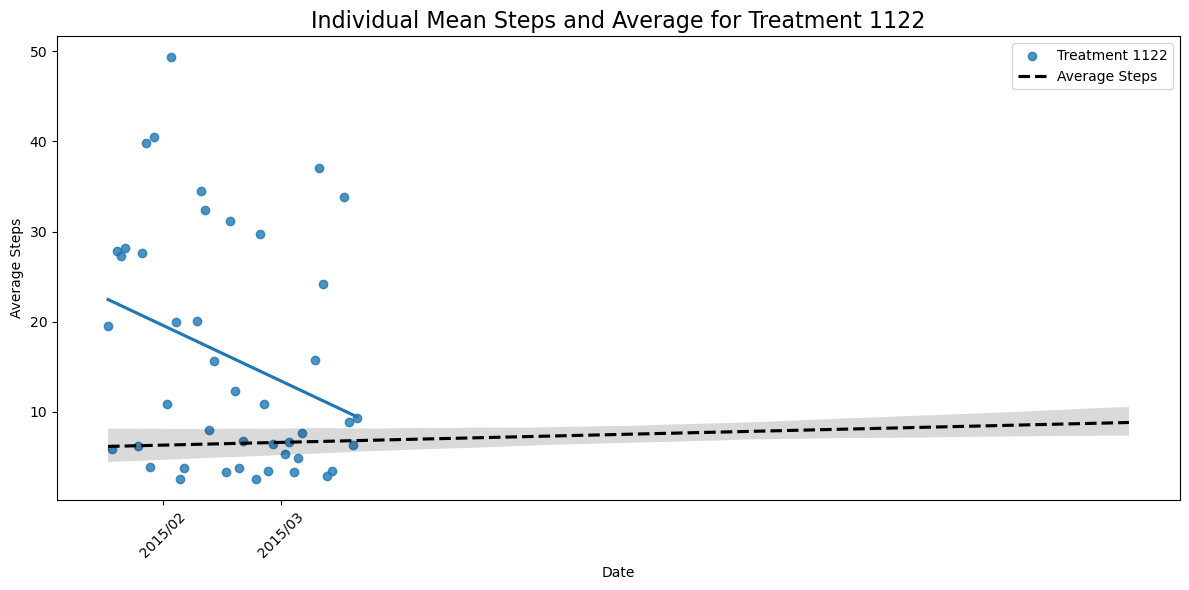

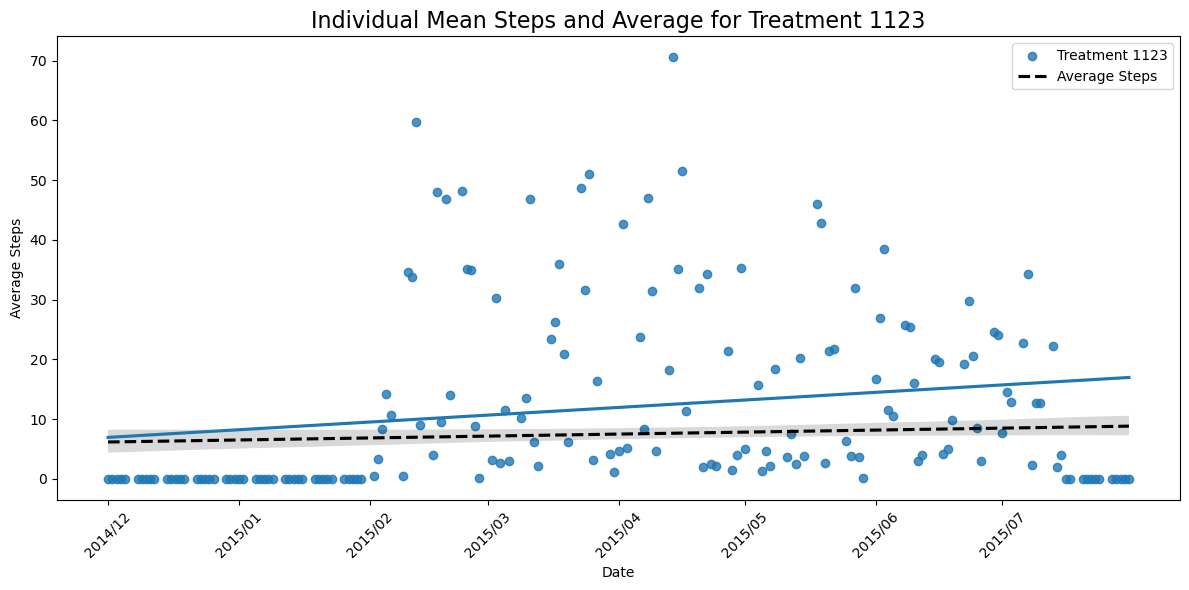

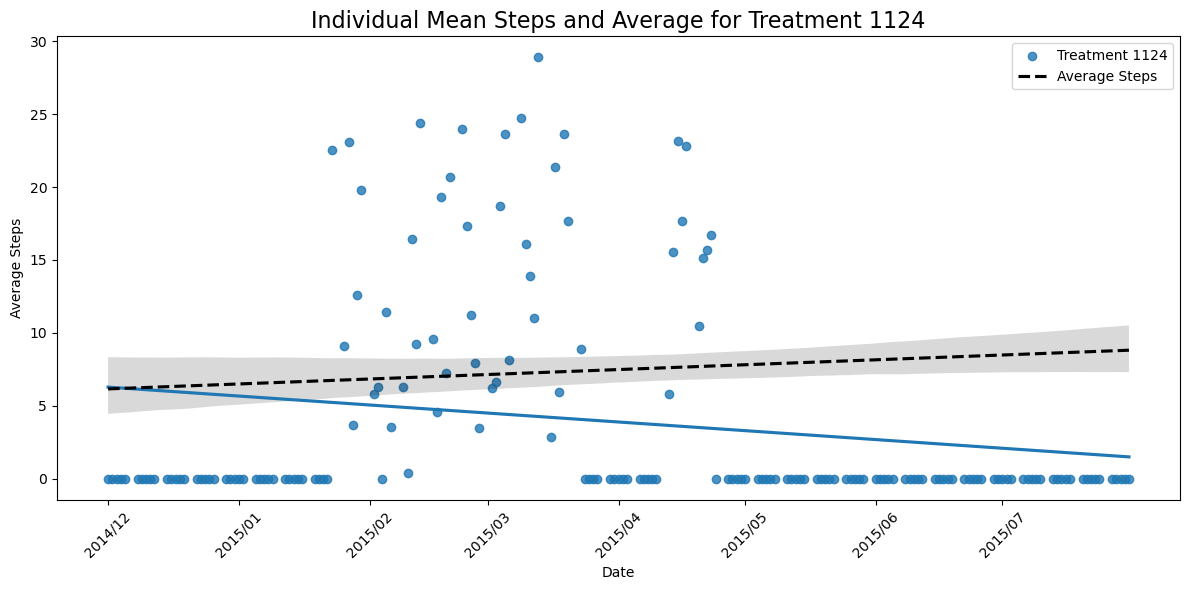

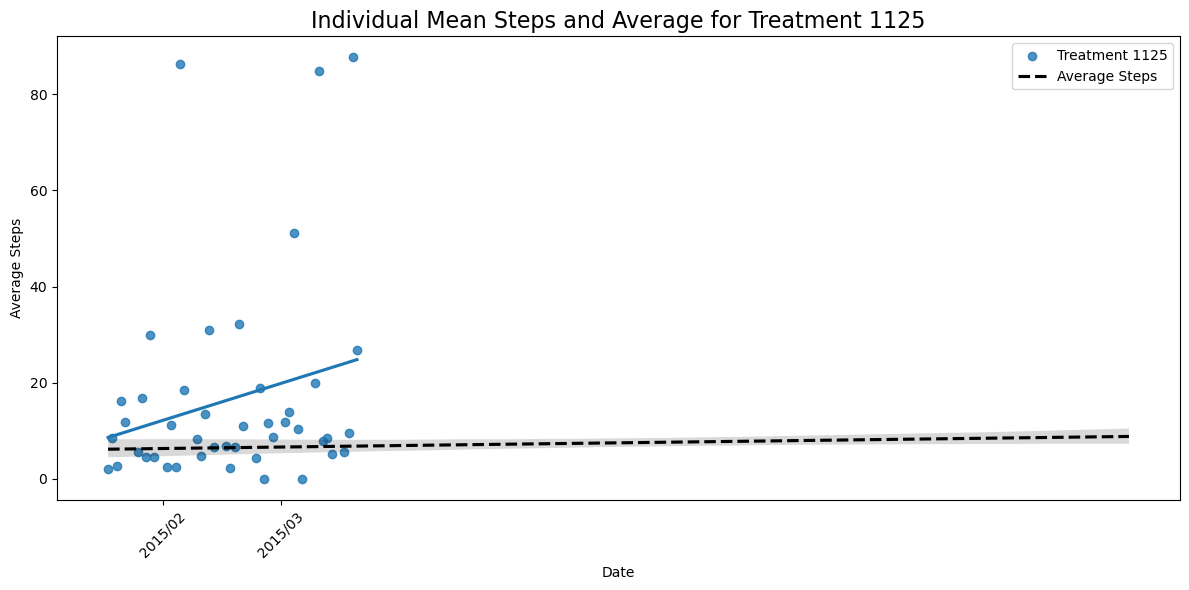

In [210]:
for treatment in treatment_ids:
    # Filter data for the current treatment_id
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()
    
    # Convert 'date' to numeric for regression
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days
    
    # Prepare x-ticks (first day of each month)
    months = pd.date_range(start=subset['date'].min(), end=subset['date'].max(), freq='MS')
    month_numeric = (months - subset['date'].min()).days
    
    # Use show_plot function with both regressions
    show_plot(
        fig_size=(12, 6),
        reg_plot_data=[subset, average_steps],  # Liste des deux jeux de données
        reg_plot_x=['date_numeric', 'date_numeric'],  # Liste des deux variables x
        reg_plot_y=['steps', 'steps'],  # Liste des deux variables y
        reg_plot_scatter=[True, False],  # Scatter pour le 1er, ligne pour le 2nd
        reg_plot_ci=[None, 95],  # Pas d'intervalle de confiance pour les deux
        reg_plot_label=[
            f'Treatment {treatment}',  # Libellé avec tiret
            'Average Steps'           # Libellé avec tiret
        ],
        reg_plot_color=[None, 'black'],  # Couleur par défaut pour le 1er, noir pour le second
        reg_plot_line_kws=[
            None,  # Aucun style spécial pour la première régression
            {'color': 'black', 'linestyle': '--'}  # Style pour la moyenne
        ],
        nbr_of_reg_plot=2,  # Deux courbes de régression
        x_ticks_ticks=month_numeric,
        x_ticks_label=months.strftime('%Y/%m'),
        x_ticks_rotation=45,
        title=f"Individual Mean Steps and Average for Treatment {treatment}",
        x_label="Date",
        y_label="Average Steps",
        legend=True,
        tight_layout=[0, 0, 1, 1]  # Ajustement pour éviter les coupures
    )

### Plot 6: Superposed individuals and average steps

In [211]:
# Define a list of colors manually (you peux ajouter plus si nécessaire)
treatment_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [212]:
# Make sure there are enough colors for the number of treatment IDs
if len(treatment_ids) > len(treatment_colors):
    raise ValueError("Not enough colors for the number of treatment IDs!")

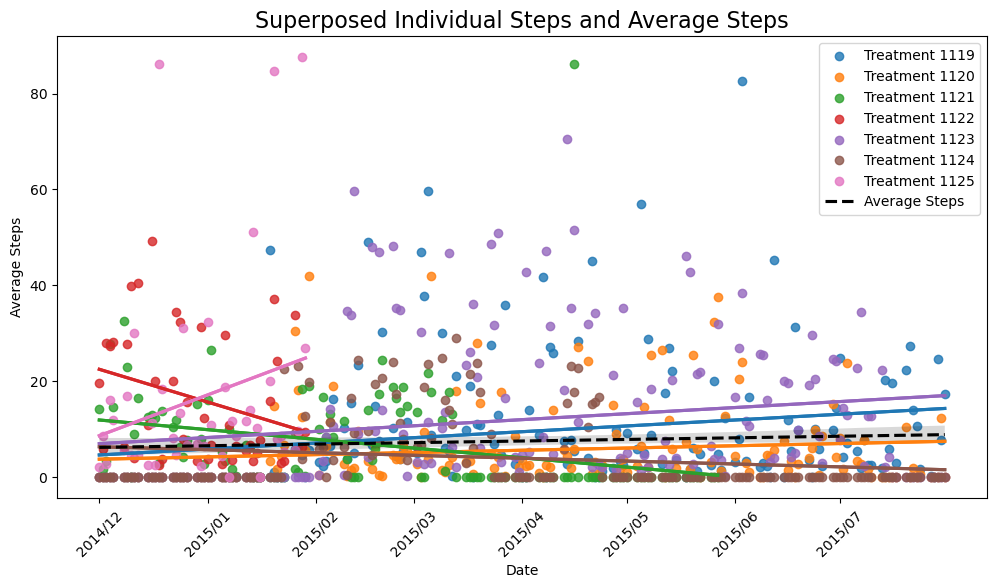

In [213]:
# Prepare common elements
months = pd.date_range(start=average_steps['date'].min(), end=average_steps['date'].max(), freq='MS')
month_numeric = (months - average_steps['date'].min()).days

# Prepare data for show_plot
reg_plot_data = []
reg_plot_x = []
reg_plot_y = []
reg_plot_scatter = []
reg_plot_ci = []
reg_plot_label = []
reg_plot_color = []
reg_plot_line_kws = []

# Loop through each treatment_id
for i, treatment in enumerate(treatment_ids):
    subset = individual_means[individual_means['treatment_id'] == treatment].copy()
    subset.loc[:, 'date_numeric'] = (subset['date'] - subset['date'].min()).dt.days

    # Add scatter plot parameters
    reg_plot_data.append(subset)
    reg_plot_x.append('date_numeric')
    reg_plot_y.append('steps')
    reg_plot_scatter.append(True)  # Show points
    reg_plot_ci.append(None)       # No confidence interval for scatter
    reg_plot_label.append(f'Treatment {treatment}')
    reg_plot_color.append(treatment_colors[i])
    reg_plot_line_kws.append(None)

    # Add regression line parameters
    reg_plot_data.append(subset)
    reg_plot_x.append('date_numeric')
    reg_plot_y.append('steps')
    reg_plot_scatter.append(False)  # Hide points (already shown)
    reg_plot_ci.append(None)        # No confidence interval
    reg_plot_label.append(None)     # No label (already in scatter)
    reg_plot_color.append(treatment_colors[i])
    reg_plot_line_kws.append(None)

# Add average steps line
reg_plot_data.append(average_steps)
reg_plot_x.append('date_numeric')
reg_plot_y.append('steps')
reg_plot_scatter.append(False)
reg_plot_ci.append(95)
reg_plot_label.append('Average Steps')
reg_plot_color.append('black')
reg_plot_line_kws.append({'color': 'black', 'linestyle': '--'})

# Calculate total number of plots (2 per treatment + 1 average)
nbr_of_reg_plot = len(treatment_ids) * 2 + 1

# Show the plot using your function
show_plot(
    fig_size=(12, 6),
    reg_plot_data=reg_plot_data,
    reg_plot_x=reg_plot_x,
    reg_plot_y=reg_plot_y,
    reg_plot_scatter=reg_plot_scatter,
    reg_plot_ci=reg_plot_ci,
    reg_plot_label=reg_plot_label,
    reg_plot_color=reg_plot_color,
    reg_plot_line_kws=reg_plot_line_kws,
    nbr_of_reg_plot=nbr_of_reg_plot,
    x_ticks_ticks=month_numeric,
    x_ticks_label=months.strftime('%Y/%m'),
    x_ticks_rotation=45,
    title="Superposed Individual Steps and Average Steps",
    x_label="Date",
    y_label="Average Steps",
    legend=True
)

### Plot 7: Correlation matrix

In [214]:
# Keep only numeric columns
df_numeric = df.select_dtypes(include=['number'])

In [215]:
# Compute correlation matrix
corr = df_numeric.corr()

In [216]:
# Remove columns that contain only NaN values
corr = corr.dropna(axis=1, how='all').dropna(axis=0, how='all')

In [217]:
# Define a threshold for correlation values
threshold = 0.1

In [218]:
# Create a mask excluding the diagonal
mask = (corr.abs() < threshold).sum(axis=0) == (corr.shape[0] - 1)

In [219]:
# Get columns where all correlations (except diagonal) are below the threshold
low_correlation_cols = corr.columns[mask]

In [220]:
# Drop these columns and rows from the correlation matrix
corr = corr.drop(columns=low_correlation_cols, index=low_correlation_cols)

In [221]:
# Print correlation matrix as a table
print("Correlation Matrix:")
print(corr)

Correlation Matrix:
              treatment_id  fitbit_id  calories      mets     level     steps  \
treatment_id      1.000000   0.494536  0.014633  0.017100  0.032617  0.021055   
fitbit_id         0.494536   1.000000 -0.142260 -0.101687 -0.093877 -0.093423   
calories          0.014633  -0.142260  1.000000  0.979279  0.938059  0.945351   
mets              0.017100  -0.101687  0.979279  1.000000  0.960019  0.951001   
level             0.032617  -0.093877  0.938059  0.960019  1.000000  0.897487   
steps             0.021055  -0.093423  0.945351  0.951001  0.897487  1.000000   
distance          0.032102  -0.093178  0.948141  0.949546  0.892006  0.997812   

              distance  
treatment_id  0.032102  
fitbit_id    -0.093178  
calories      0.948141  
mets          0.949546  
level         0.892006  
steps         0.997812  
distance      1.000000  


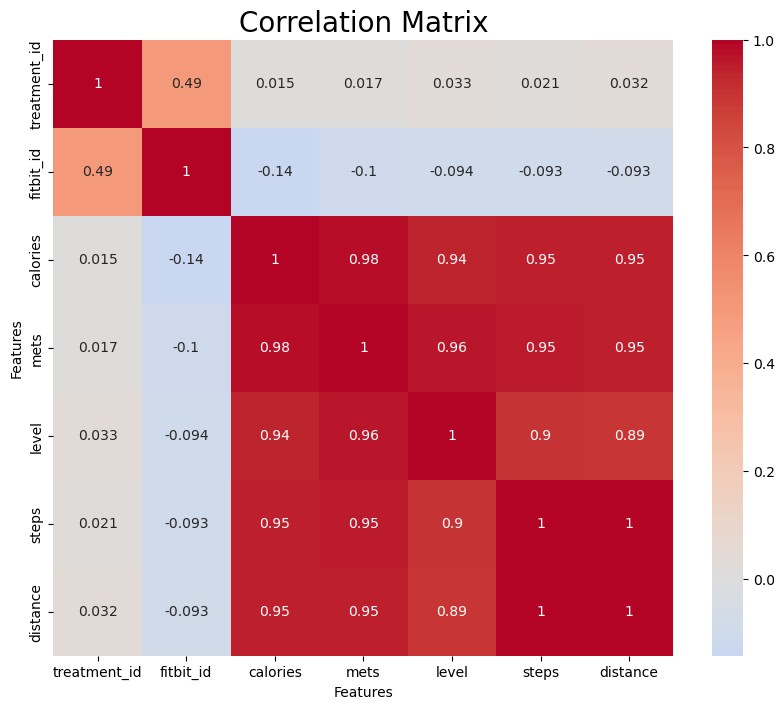

In [222]:
# Plot the correlation matrix
show_plot(fig_size=(10, 8), title="Correlation Matrix", x_label="Features",
        y_label="Features", heatmap_data=corr, heatmap_annot=True,
        heatmap_cmap='coolwarm', heatmap_center=0, tile_font_size=20)

### Plot 8: DAG graph

In [223]:
# Initialize a directed graph
dag = nx.DiGraph()

In [224]:
# Add nodes (dag_features)
dag_features = ['date', 'working_days', 'calories', 'mets', 'level', 'steps', 'distance', 'season']
dag.add_nodes_from(dag_features)

In [225]:
# Define the relationships based on correlation analysis
edges = [
    ('date', 'working_days'),
    ('date', 'season'),
    ('working_days', 'steps'),
    ('season', 'steps'),
    ('steps', 'calories'),
    ('steps', 'mets'),
    ('steps', 'level'),
    ('steps', 'distance'),
]

dag.add_edges_from(edges)

In [226]:
# Define custom positions for some nodes
pos = {
    'date': (0, 1),            # Position en haut pour 'date'
    'working_days': (-1, 0),   # Position à gauche pour 'working_days'
    'calories': (-1, -1),        # 'calories' au centre
    'mets': (0, -1),            # 'mets' à droite de 'calories'
    'season': (1, 0),          # 'level' en dessous de 'calories'
    'steps': (0, 0),          # 'steps' en dessous de 'mets'
    'distance': (-1, -2),        # 'distance' en bas de 'level'
    'level': (1, -2)        # 'distance' en bas de 'level'
}

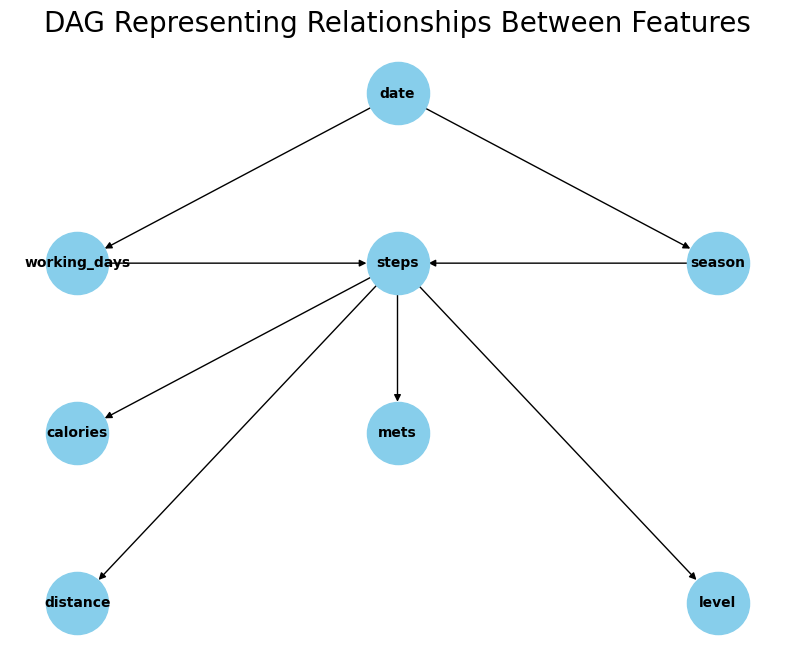

In [227]:
show_plot(fig_size=(10, 8), title="DAG Representing Relationships Between Features",
        tile_font_size=20, dag_graph=dag, dag_pos=pos,
        dag_with_labels=True, dag_node_size=2000, dag_node_color="skyblue",
        dag_node_font_size=10, dag_font_weight='bold', dag_edge_color='black')

## Step 2: Build a first version of the model

In [245]:
# Importations nécessaires
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Fonction pour déterminer la saison
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# 1. Préparation des données
print("Preparing data...")
df['season'] = df['date'].apply(get_season)
df['hour'] = df['date'].dt.hour
df['is_weekend'] = df['date'].dt.weekday >= 5
df['cumulative_steps'] = df.groupby(['treatment_id', df['date'].dt.date])['steps'].cumsum()

# 2. Création de la target (à 18h seulement)
print("Creating target variable...")
df['target'] = 0
for user_id, user_avg in df[df['hour'] == 18].groupby('treatment_id')['cumulative_steps'].mean().items():
    mask = (df['treatment_id'] == user_id) & (df['hour'] == 18)
    df.loc[mask, 'target'] = (df.loc[mask, 'cumulative_steps'] >= user_avg).astype(int)

# 3. Création des variables one-hot pour les saisons
print("Creating season features...")
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    df[f'season_{season}'] = (df['season'] == season).astype(int)

# 4. Définition des features
features = ['hour', 'is_weekend', 'cumulative_steps',
           'season_Spring', 'season_Summer', 'season_Autumn', 'season_Winter']

# 5. Nettoyage des données
print("Cleaning data...")
# Supprimer les lignes avec NaN dans les features
df_clean = df.dropna(subset=features).copy()

# 6. Séparation train/test
print("Splitting data...")
train_users, test_users = train_test_split(df_clean['treatment_id'].unique(), test_size=0.3, random_state=42)
train_data = df_clean[df_clean['treatment_id'].isin(train_users)]
test_data = df_clean[df_clean['treatment_id'].isin(test_users)]

X_train = train_data[features]
y_train = train_data['target']
X_test = test_data[features]
y_test = test_data['target']

# 7. Entraînement du modèle avec SMOTE
print("Training model...")
try:
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)
    
    model = RandomForestClassifier(random_state=42, class_weight='balanced', 
                                 n_estimators=200, min_samples_leaf=5, max_depth=10)
    model.fit(X_res, y_res)
    
    # Évaluation
    y_pred = model.predict(X_test)
    print("\nModel Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
except ValueError as e:
    print(f"\nSMOTE Error: {e}")
    print("Using original imbalanced data (no SMOTE)")
    model = RandomForestClassifier(random_state=42, class_weight='balanced',
                                 n_estimators=200, min_samples_leaf=5, max_depth=10)
    model.fit(X_train, y_train)

# 8. Fonction de prédiction
def predict_for_user():
    print("\nPredict whether you will reach your daily step goal:")
    
    while True:
        try:
            # Saisie utilisateur
            current_date = input("\nEnter current date (YYYY-MM-DD): ")
            current_time = input("Enter current time (HH:MM): ")
            current_steps = float(input("Current cumulative steps: "))
            
            # Validation des entrées
            hour = int(current_time.split(':')[0])
            if hour < 0 or hour > 23:
                raise ValueError("Hour must be between 0 and 23")
            if current_steps < 0:
                raise ValueError("Steps must be positive")
                
            # Calcul des features
            date_obj = pd.to_datetime(current_date)
            season = get_season(date_obj)
            is_weekend = date_obj.weekday() >= 5
            
            # Préparation des données
            user_data = pd.DataFrame({
                'hour': [hour],
                'is_weekend': [int(is_weekend)],
                'cumulative_steps': [current_steps],
                'season_Spring': [1 if season == 'Spring' else 0],
                'season_Summer': [1 if season == 'Summer' else 0],
                'season_Autumn': [1 if season == 'Autumn' else 0],
                'season_Winter': [1 if season == 'Winter' else 0]
            })

            # Prédiction avec lissage des probabilités
            proba = model.predict_proba(user_data[features])[0][1]
            
            # Transformation logit pour éviter les 0% et 100%
            proba = max(0.01, min(0.99, proba))  # Borné entre 1% et 99%
            
            # Ajustement basé sur la progression
            progress_ratio = current_steps / daily_goal
            time_ratio = hour / 18  # Ratio de la journée écoulée
            
            # Formule d'ajustement (peut être fine-tunée)
            adjusted_proba = proba * (1 + (progress_ratio - time_ratio))
            adjusted_proba = max(0.01, min(0.99, adjusted_proba))
            
            # Seuil dynamique
            prediction_threshold = 0.5 - (0.3 * (1 - time_ratio))
            prediction = adjusted_proba >= prediction_threshold
            
            # Affichage
            print(f"\nPrediction for {current_date} at {current_time}:")
            print(f"- Current: {current_steps:.0f}/{daily_goal:.0f} ({progress_ratio:.1%})")
            print(f"- Time elapsed: {time_ratio:.1%} of day")
            print(f"- Prediction: {'WILL REACH' if prediction else 'WILL NOT REACH'}")
            print(f"- Confidence: {adjusted_proba:.1%} (adjusted)")
            
            # Recommandations
            if hour < 18:
                remaining_hours = 18 - hour
                needed_steps = max(daily_goal - current_steps, 0)
                if remaining_hours > 0:
                    hourly_pace = needed_steps / remaining_hours
                    print(f"\nTo reach your goal by 18:00:")
                    print(f"- Needed: {needed_steps:.0f} more steps")
                    print(f"- Required pace: {hourly_pace:.0f} steps/hour")
                    
                    if hourly_pace > 1500:
                        print("- Activity suggestion: Vigorous walk + jogging")
                    elif hourly_pace > 1000:
                        print("- Activity suggestion: Brisk walking")
                    else:
                        print("- Activity suggestion: Leisurely walking")
            
            break
                
        except Exception as e:
            print(f"\nError: {str(e)}")
            print("Please try again with valid inputs.")

# 9. Exemple d'utilisation
print("\nStep Goal Prediction System")
print("---------------------------")
print(f"Based on average goal: {7.49*60*24:.0f} steps per day")
predict_for_user()

Preparing data...
Creating target variable...
Creating season features...
Cleaning data...
Splitting data...
Training model...

Model Evaluation:
Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     23831
           1       0.95      0.74      0.83      7669

    accuracy                           0.93     31500
   macro avg       0.94      0.86      0.89     31500
weighted avg       0.93      0.93      0.92     31500


Step Goal Prediction System
---------------------------
Based on average goal: 10786 steps per day

Predict whether you will reach your daily step goal:

Prediction for 2025-03-28 at 12:38:
- Current: 100/10786 (0.9%)
- Time elapsed: 66.7% of day
- Prediction: WILL NOT REACH
- Confidence: 1.0% (adjusted)

To reach your goal by 18:00:
- Needed: 10686 more steps
- Required pace: 1781 steps/hour
- Activity suggestion: Vigorous walk + jogging
